## Data Wrangling Project
## Adalyn Goodwin, James Williams, Andy Kram, Ethan Backhaus

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By # used to import different ways to access data in the XML or HTML file
from selenium.webdriver.chrome.service import Service # no longer need to download a driver file, use service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException

from webdriver_manager.chrome import ChromeDriverManager # used to manage the Chrome driver to emulate a Chrome web browser
import re
import time
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
movie_df = pd.read_csv('top-500-movies.csv')
display(movie_df)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0
497,498,1995-12-22,Cutthroat Island,/movie/Cutthroat-Island#tab=summary,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,NaN,1995.0
498,499,2013-12-19,The Secret Life of Walter Mitty,/movie/Secret-Life-of-Walter-Mitty-The-(2012)#...,91000000,58236838,187861183,12765508.0,PG,Adventure,2922.0,114.0,2013.0


In [3]:
#drop uneeded columns, and the row with weird information
movie_df = movie_df.drop(columns= ['rank','url','theaters'])
movie_df = movie_df.head(499)

In [4]:
#using the scraping loop from the scraping Jupyter Notebook from class
def random_scroll(browser, total_wait_time):
    # get the total height of the page
    total_height = browser.execute_script("return document.body.scrollHeight")
    
    # number of steps to scroll (you can adjust this number)
    scroll_steps = random.randint(3, 10) # randomize how many scroll steps we will use
    
    # calculate the height to scroll on each step
    scroll_increment = total_height // scroll_steps

    # calculate the total time available for scrolling each step
    time_per_step = total_wait_time / scroll_steps
    
    # random scrolling across time
    for step in range(scroll_steps):
        # scroll by the increment (dividing total height by number of steps)
        browser.execute_script(f"window.scrollBy(0, {scroll_increment});")
        
        # random wait time between scrolls to simulate varying speed
        random_wait = random.uniform(0.5 * time_per_step, 1.5 * time_per_step)  # randomize the wait within a range
        time.sleep(random_wait)
        
    # final scroll to make sure you are at the very bottom (in case it didn't exactly match)
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")


# initialize the Selenium web driver (Chrome in this case)
# browser = webdriver.Chrome(service=Service(ChromeDriverManager().install())) # this occasionally causes "Status code was: -9" error.
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
browser.maximize_window()
# create an empty lists to store the extracted data 
#(for some reason we never got this to work when we didn't name it year, so we gave up and named it year)
year = []

https://help.imdb.com/contact/developer/?ref_=imdb072023_sub_us_gs_20343839646_156674457808_kwd-1185453774126&gad_source=1&gad_campaignid=20343839646&gbraid=0AAAAAp6knh1U-40f6nrPrnuGLC25xq675&gclid=CjwKCAiAuIDJBhBoEiwAxhgyFo8SMd7P1J-TSIcBk45GfwOwLv_onaW5KYvYXTlG6P1X5C4HJBhLphoCS6gQAvD_BwE
Api code

In [5]:
#set url to get
url = f"https://www.imdb.com/chart/top/"

# navigate to the web page using the URL
browser.get(url)
#browser.maximize_window()

# add a random delay before scraping
total_wait_time = random.uniform(5, 12)  # random wait time between 3 and 10 seconds
random_scroll(browser, total_wait_time)

# The next blocks were old things we were going to do for scraping before we realized that we could scrape using the class below. 
#before that, we were going to scrape everything individually

# scrape the movie name
#movies = browser.find_elements(By.XPATH, "//div[contains(@class, 'ipc-title')]")

#for m in movies:
 #   movie_name.append(m.text)

# scrape this weird class name for all of our information.  THIS WORKED ON 12/12!!! They changed the class name from what it was before Thanksgiving break.
year_released = browser.find_elements(By.XPATH, "//div[contains(@class, 'sc-b4f120f6-0')]")

#add it to the year list from above (once again it only worked when named year)
for y in year_released:
    year.append(y.text)

# close the automated browser
browser.close()

#print(movie_name)
#print(len(movie_name))
print(year)

['#1\nThe Shawshank Redemption\n19942h 22mR\n9.3\n (3.1M)\nRate\nMark as watched', '#2\nThe Godfather\n19722h 55mR\n9.2\n (2.2M)\nRate\nMark as watched', '#3\nThe Dark Knight\n20082h 32mPG-13\n9.1\n (3.1M)\nRate\nMark as watched', '#4\nThe Godfather Part II\n19743h 22mR\n9.0\n (1.5M)\nRate\nMark as watched', '#5\n12 Angry Men\n19571h 36mApproved\n9.0\n (963K)\nRate\nMark as watched', '#6\nThe Lord of the Rings: The Return of the King\n20033h 21mPG-13\n9.0\n (2.1M)\nRate\nMark as watched', "#7\nSchindler's List\n19933h 15mR\n9.0\n (1.6M)\nRate\nMark as watched", '#8\nThe Lord of the Rings: The Fellowship of the Ring\n20012h 58mPG-13\n8.9\n (2.2M)\nRate\nMark as watched', '#9\nPulp Fiction\n19942h 34mR\n8.8\n (2.4M)\nRate\nMark as watched', '#10\nThe Good, the Bad and the Ugly\n19662h 58mR\n8.8\n (878K)\nRate\nMark as watched', '#11\nThe Lord of the Rings: The Two Towers\n20022h 59mPG-13\n8.8\n (1.9M)\nRate\nMark as watched', '#12\nForrest Gump\n19942h 22mPG-13\n8.8\n (2.4M)\nRate\nMark 

In [6]:
# initialize lists to split this code into
movie_name = []
years = []
duration = []
imdb_rating = []
votes = []

#using a for loop to split the big list into the smaller lists created above
for item in year:
    #split on the \n
    lines = item.split("\n")

    #append to the proper lists. We didn't end up using all, but I left them to show our thought processes again
    movie_name.append(lines[0])
    years.append(lines[1].strip("()"))
    duration.append(lines[2])
    imdb_rating.append(lines[3])
    votes.append(lines[4].strip("()"))

# Check the result
print(movie_name)
print(years)
print(duration)
print(imdb_rating)
print(votes)


['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', '#11', '#12', '#13', '#14', '#15', '#16', '#17', '#18', '#19', '#20', '#21', '#22', '#23', '#24', '#25', '#26', '#27', '#28', '#29', '#30', '#31', '#32', '#33', '#34', '#35', '#36', '#37', '#38', '#39', '#40', '#41', '#42', '#43', '#44', '#45', '#46', '#47', '#48', '#49', '#50', '#51', '#52', '#53', '#54', '#55', '#56', '#57', '#58', '#59', '#60', '#61', '#62', '#63', '#64', '#65', '#66', '#67', '#68', '#69', '#70', '#71', '#72', '#73', '#74', '#75', '#76', '#77', '#78', '#79', '#80', '#81', '#82', '#83', '#84', '#85', '#86', '#87', '#88', '#89', '#90', '#91', '#92', '#93', '#94', '#95', '#96', '#97', '#98', '#99', '#100', '#101', '#102', '#103', '#104', '#105', '#106', '#107', '#108', '#109', '#110', '#111', '#112', '#113', '#114', '#115', '#116', '#117', '#118', '#119', '#120', '#121', '#122', '#123', '#124', '#125', '#126', '#127', '#128', '#129', '#130', '#131', '#132', '#133', '#134', '#135', '#136', '#137', '#138', '#1

In [7]:
#movie_name = []
#years = []
#duration = []
#imdb_rating = []
#votes = []

#for item in year:
    #lines = item.split("\n")
    
    # movie title may include the rank number, so remove it
    #title = lines[0].split(". ", 1)[1] if ". " in lines[0] else lines[0]
    
    #movie_name.append(title)
    #years.append(lines[1].strip("()"))
    #duration.append(lines[2])
    #imdb_rating.append(lines[3])
    #votes.append(lines[4].strip("()"))

# Check the result
#print(movie_name)
#print(years)
#print(duration)
#print(imdb_rating)
#print(votes)


In [8]:
# Create a dictionary using the information from above
data = {
    'Movie': movie_name,
    'Year': years,
    'IMDB_Rating': imdb_rating,
    'Duration': duration,
    'Votes': votes
}



# Convert to DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
display(df.head())

,Movie,Year,IMDB_Rating,Duration,Votes
0,#1,The Shawshank Redemption,9.3,19942h 22mR,(3.1M
1,#2,The Godfather,9.2,19722h 55mR,(2.2M
2,#3,The Dark Knight,9.1,20082h 32mPG-13,(3.1M
3,#4,The Godfather Part II,9.0,19743h 22mR,(1.5M
4,#5,12 Angry Men,9.0,19571h 36mApproved,(963K


In [9]:
# remove hashtags from movie, create a new column
df['rank'] = df['Movie'].str[1:]
#df['rank'] = df['Movie'].str.extract(r'#(\d+)', expand=False).astype(int)

# rename title to year
df['title'] = df['Year']

#clean Votes to numeric
def parse_votes(v):
    #strip the (), capitalize the M or K in the votes column
    v = str(v).strip("() ").upper()  
    if v.endswith("M"):
        return int(float(v[:-1]) * 1_000_000)
    if v.endswith("K"):
        return int(float(v[:-1]) * 1_000)
    return int(v)

#apply the user def above
df['votes'] = df['Votes'].apply(parse_votes)

# 4. Keep only the four columns you want
df_clean = df[['rank', 'title', 'IMDB_Rating', 'votes']]

df_clean.head()

,rank,title,IMDB_Rating,votes
0,1,The Shawshank Redemption,9.3,3100000
1,2,The Godfather,9.2,2200000
2,3,The Dark Knight,9.1,3100000
3,4,The Godfather Part II,9.0,1500000
4,5,12 Angry Men,9.0,963000


In [10]:
print(movie_df.columns)
print(df_clean.columns)

Index(['release_date', 'title', 'production_cost', 'domestic_gross',
       'worldwide_gross', 'opening_weekend', 'mpaa', 'genre', 'runtime',
       'year'],
      dtype='object')
Index(['rank', 'title', 'IMDB_Rating', 'votes'], dtype='object')


In [11]:
# merge top 500 with IMDb ratings
merged_df = pd.merge(movie_df, df_clean, on='title', how='left')

merged_df.head()

,release_date,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,runtime,year,rank,IMDB_Rating,votes
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,181.0,2019.0,74,8.4,1400000.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,136.0,2011.0,NaN,NaN,NaN
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,141.0,2015.0,NaN,NaN,NaN
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,136.0,2015.0,NaN,NaN,NaN
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,156.0,2018.0,60,8.4,1300000.0


In [12]:
#save to a csv. We did this so that we could do our graphs on another notebook, then we copied the code back into the notebook
merged_df.to_csv('cleaned_movie_df.csv')

In [13]:
#read in our csv
df = pd.read_csv('cleaned_movie_df.csv')

#strip whitespace from column names
df.columns = df.columns.str.strip()

C:\Users\james\AppData\Local\Temp\ipykernel_37108\3810778599.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


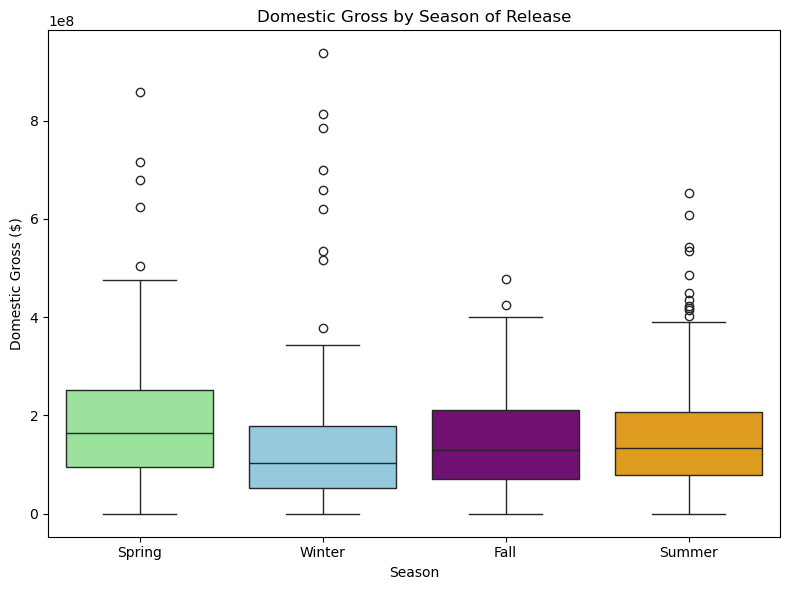

In [14]:
# Convert release_date to datetime and extract season
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['month'] = df['release_date'].dt.month
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Figure 1. Box office revenues vs. season of release
plt.figure(figsize=(8,6))
sns.boxplot(
    x='season', 
    y='domestic_gross', 
    data=df,
    palette={
        'Winter': 'skyblue',
        'Spring': 'lightgreen',
        'Summer': 'orange',
        'Fall': 'purple'
    }
)
plt.title('Domestic Gross by Season of Release')
plt.ylabel('Domestic Gross ($)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()


Correlation between release month and domestic gross: -0.020 (p-value=0.649)


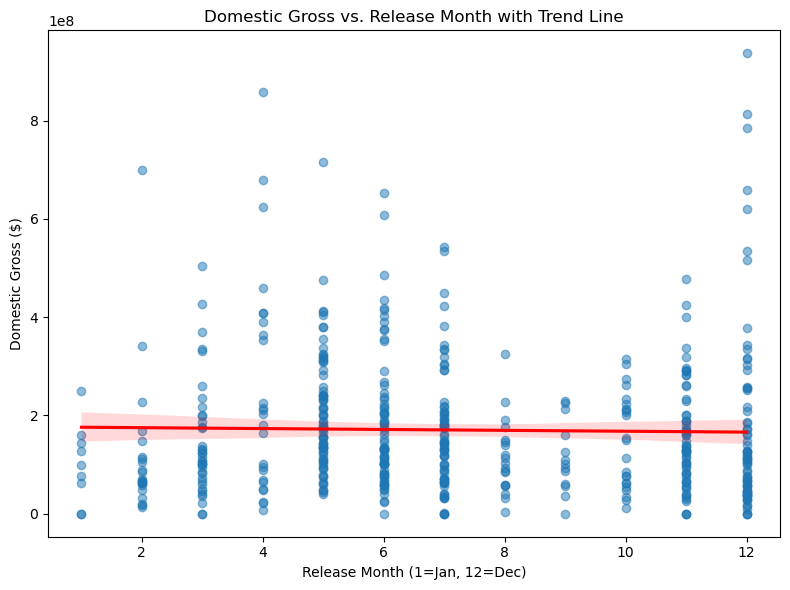

In [15]:
#Figure 2. Months vs. domestic gross
# Calculate correlation between domestic gross and month of release
# Drop rows where either month or domestic_gross is missing
subset = df[['month', 'domestic_gross']].dropna()
# Correlation
corr, pval = stats.pearsonr(subset['month'], subset['domestic_gross'])
print(f"Correlation between release month and domestic gross: {corr:.3f} (p-value={pval:.3f})")

# Scatterplot with regression trend line
plt.figure(figsize=(8,6))
sns.regplot(x='month', y='domestic_gross', data=subset,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Domestic Gross vs. Release Month with Trend Line')
plt.xlabel('Release Month (1=Jan, 12=Dec)')
plt.ylabel('Domestic Gross ($)')
plt.tight_layout()
plt.show()

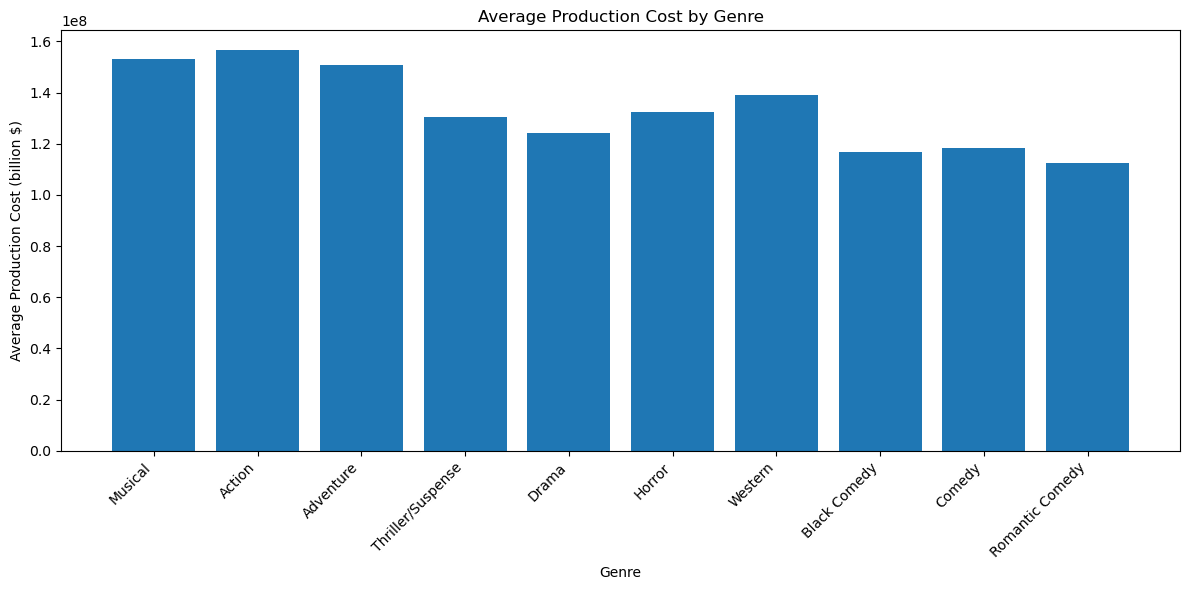

In [16]:
# Group by genre and calculate averages
genre_stats = df.groupby('genre')[['production_cost', 'worldwide_gross']].mean()

# Sort genres for clean plotting
genre_stats = genre_stats.sort_values('worldwide_gross', ascending=False)

# Figure 4. Production cost by genre
plt.figure(figsize=(12, 6))
plt.bar(genre_stats.index, genre_stats['production_cost'])
plt.title("Average Production Cost by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Production Cost (billion $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() 

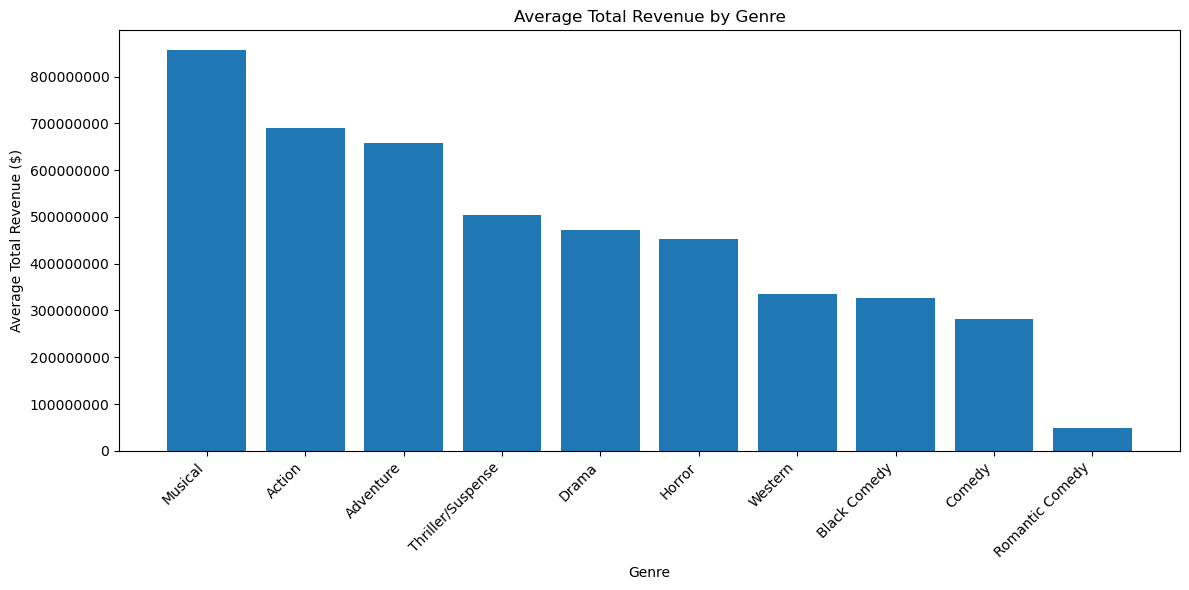

In [17]:
# Create a total revenue column
df["total_revenue"] = df["domestic_gross"] + df["worldwide_gross"]

# Group by genre and compute average total revenue
genre_total = df.groupby("genre")["total_revenue"].mean().sort_values(ascending=False)

#Figure 3. Total revenue by genre
plt.figure(figsize=(12, 6))
plt.bar(genre_total.index, genre_total.values)
plt.title("Average Total Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Total Revenue ($)")
plt.xticks(rotation=45, ha="right")

# Turn off notation
plt.ticklabel_format(style="plain", axis="y")

plt.tight_layout()
plt.show()

Pearson Correlation: 0.4584


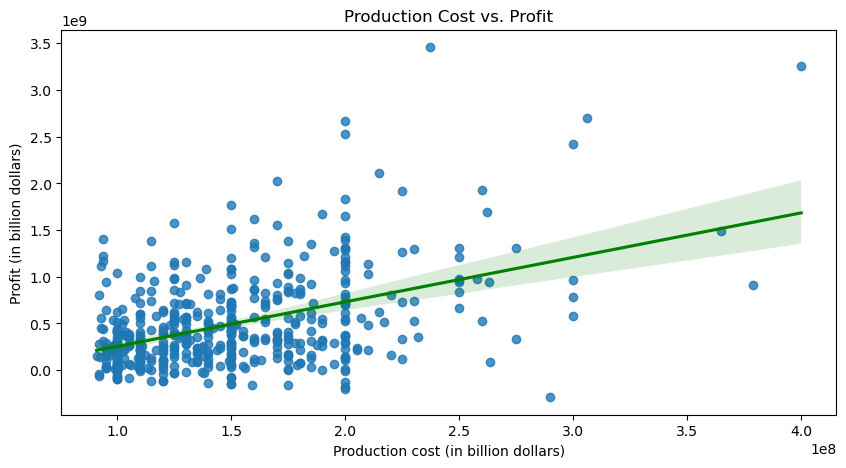

In [18]:
# create a profit column
df['profit'] = df['total_revenue']-df['production_cost']
#figure 5. production costs vs. profit
plt.figure(figsize = (10,5))
sns.regplot(x=df['production_cost'], y=df['profit'], data = df, line_kws={"color": "green"})
plt.title('Production Cost vs. Profit')
plt.xlabel('Production cost (in billion dollars)')
plt.ylabel('Profit (in billion dollars)')
corr_coef2, pval2 = stats.pearsonr(df['profit'], df['production_cost'])
print(f'Pearson Correlation: {round(corr_coef2,4)}')

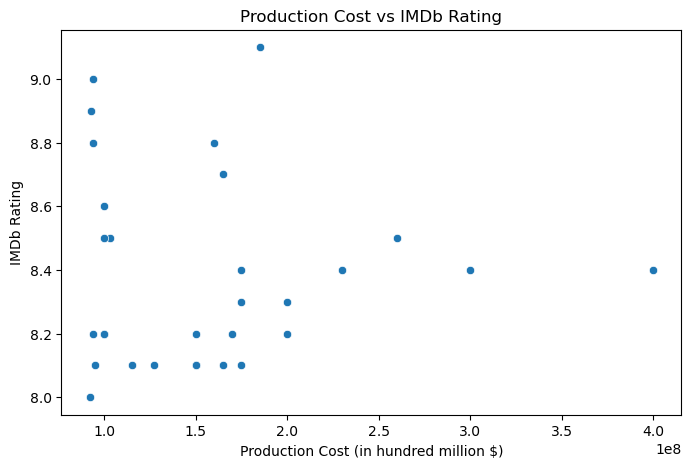

In [19]:
#figure 6. production cost vs. imdb rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='production_cost', y='IMDB_Rating')
plt.title("Production Cost vs IMDb Rating")
plt.xlabel("Production Cost (in hundred million $)")
plt.ylabel("IMDb Rating")


plt.show()

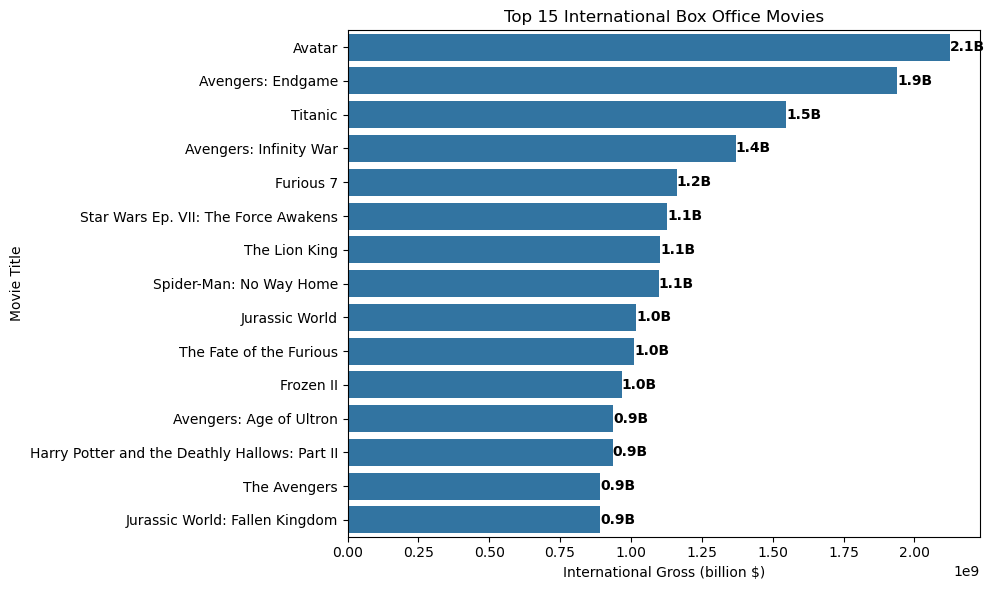

In [20]:
#I created the international gross by subtracting the worldwide gross from the domestic gross
df['international_gross'] = df['worldwide_gross'] - df['domestic_gross']
#find top 15 international gross
top_intl = df.nlargest(15, 'international_gross')[['title','genre','international_gross']]

#figure 7. Top 15 international box office movies
plt.figure(figsize=(10,6))
sns.barplot(data=top_intl, y='title', x='international_gross')
plt.title("Top 15 International Box Office Movies")
plt.xlabel("International Gross (billion $)")
plt.ylabel("Movie Title")

# add labels to the end of each bar
for index, value in enumerate(top_intl['international_gross']):
    plt.text(
        x=value,
        y=index,
        s=f"{value/1e9:.1f}B",
        va='center',
        ha='left',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

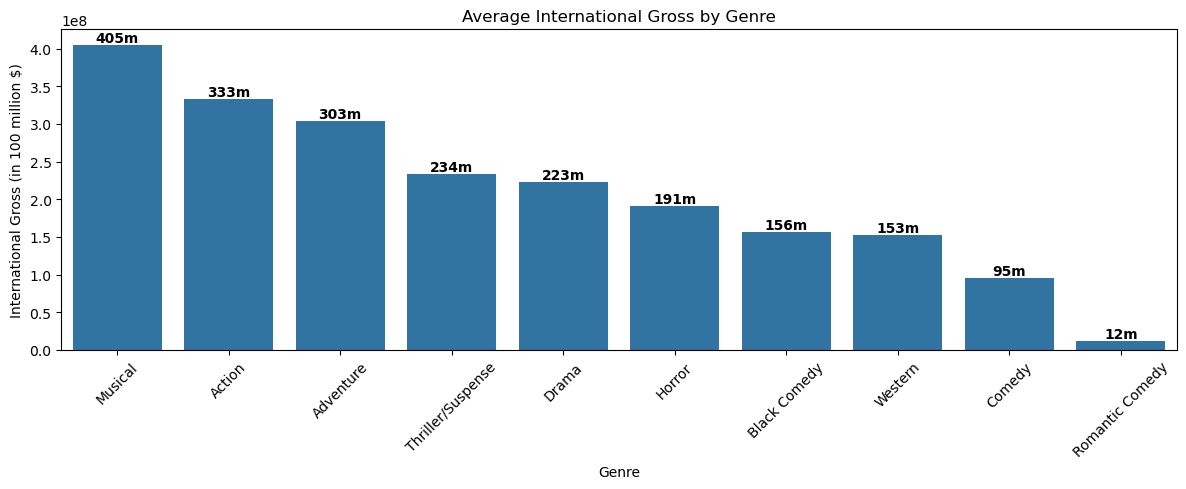

In [21]:
#group by genre for international gross
intl_genre = df.groupby('genre')['international_gross'].mean().sort_values(ascending=False)

#figure 8. Average international gross per genre
plt.figure(figsize=(12,5))
sns.barplot(x=intl_genre.index, y=intl_genre.values)
plt.title("Average International Gross by Genre")
plt.xlabel("Genre")
plt.ylabel("International Gross (in 100 million $)")
plt.xticks(rotation=45)

# add labels above each bar
for index, value in enumerate(intl_genre.values):
    plt.text(
        x=index,
        y=value,
        s=f"{value/1e6:.0f}m",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()